In [1]:
import json
data_path = '/common/zhangz2lab/zhanh/DNABERT_peft/finetune/output/'
with open(data_path+'nt_deepsea/results_step_118000.json', 'r') as file:
    data = json.load(file)
    
nt_values = data.get("eval_roc_auc_per_label", [])
nt_average = data.get("eval_roc_auc_macro", [])

print(nt_values)
print(nt_average)

[0.7711012963107835, 0.6856177001231832, 0.6550896826718355, 0.6955621156071953, 0.7172386335709402, 0.6507195905705099, 0.7304954891115185, 0.7713804194428174, 0.7798301084318673, 0.6730209091331998, 0.8824943399117815, 0.7670654094142993, 0.8485732318980049, 0.6306787963491232, 0.7181808377527772, 0.7610071668203356, 0.849183787187321, 0.9596559423609138, 0.7912634737873592, 0.7091713725553925, 0.6452586239034627, 0.9053774544656077, 0.7208101767265224, 0.7105321834488061, 0.7770392514341333, 0.8688620823251534, 0.6770777278906399, 0.7694312791161906, 0.7604772689633255, 0.756548103443251, 0.6120480109147218, 0.6692756596398257, 0.7994218462896101, 0.8261598176458809, 0.6760598152953562, 0.807052319322796, 0.8197254025882716, 0.7325018711447304, 0.7840487483491341, 0.8078590731044838, 0.6739462327508421, 0.7614708243443008, 0.6218227482811414, 0.6944978218884259, 0.7994352704340066, 0.7937957225050315, 0.6443388849384507, 0.8469499906382122, 0.7392445358746028, 0.6226016161192939, 0.

In [2]:
with open(data_path+'opt_125m_deepsea/results_step_114000.json', 'r') as file:
    data = json.load(file)
    
opt_125_values = data.get("eval_roc_auc_per_label", [])
opt_125_average = data.get("eval_roc_auc_macro", [])

print(opt_125_values)
print(opt_125_average)

[0.8125135366621986, 0.7756056105079737, 0.694164545717884, 0.7583591654410788, 0.7960217816401066, 0.7291207852451395, 0.769801018252689, 0.8147318821643713, 0.7994744288050047, 0.7817901994387514, 0.9167999443294904, 0.7738534378080455, 0.8520502845756117, 0.691062455431669, 0.7609273472798357, 0.7787937487146916, 0.8556266269366123, 0.9614554775838904, 0.8270708170559967, 0.7686600694939206, 0.7147758978596409, 0.9115511446252379, 0.6544906878710277, 0.7759577460546195, 0.7809276802166124, 0.8961785088672518, 0.6896315561679179, 0.7927793495634516, 0.7717552725419019, 0.7911481688837906, 0.6826714611602984, 0.682597065047183, 0.812933214095059, 0.8341933120411457, 0.6934880863652781, 0.8178283472700639, 0.8423705760920872, 0.672788060046241, 0.804004008253497, 0.824208189070949, 0.679988338355978, 0.7554461571017914, 0.6459814723727707, 0.6915013960722038, 0.8043706022722583, 0.7996486267376586, 0.6442119035486, 0.8514676686206866, 0.6880105713296327, 0.6306752167572327, 0.865679858

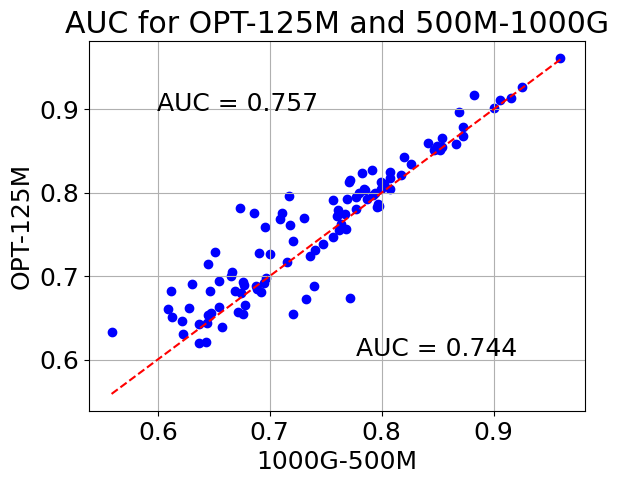

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18

# Create a scatter plot
plt.scatter(nt_values, opt_125_values, color='blue')

# Plot the dotted line y=x
min_val = min(min(opt_125_values), min(nt_values))
max_val = max(max(opt_125_values), max(nt_values))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Set labels and title
plt.ylabel('OPT-125M')
plt.xlabel('1000G-500M')
plt.title('AUC for OPT-125M and 500M-1000G')
#plt.legend()
plt.annotate('AUC = {:.3f}'.format(opt_125_average), xy=(min_val + 0.1*(max_val - min_val), max_val - 0.1*(max_val - min_val)), fontsize=18, ha="left", va="top")

# Annotate lower right region
plt.annotate('AUC = {:.3f}'.format(nt_average), xy=(max_val - 0.1*(max_val - min_val), min_val + 0.1*(max_val - min_val)), fontsize=18, ha="right", va="bottom")

# Display the plot
plt.grid(True)
plt.show()


In [4]:
import pandas as pd

df_125m = pd.read_csv(data_path+'opt_125m_deepsea/results.csv')
values_125m = df_125m.loc[::1, 'eval_roc_auc_macro']
values_125m_400steps = df_125m.loc[::4, 'eval_roc_auc_macro']


df_nt = pd.read_csv(data_path+'nt_deepsea/results.csv')
values_nt = df_nt.loc[8::1, 'eval_roc_auc_macro']


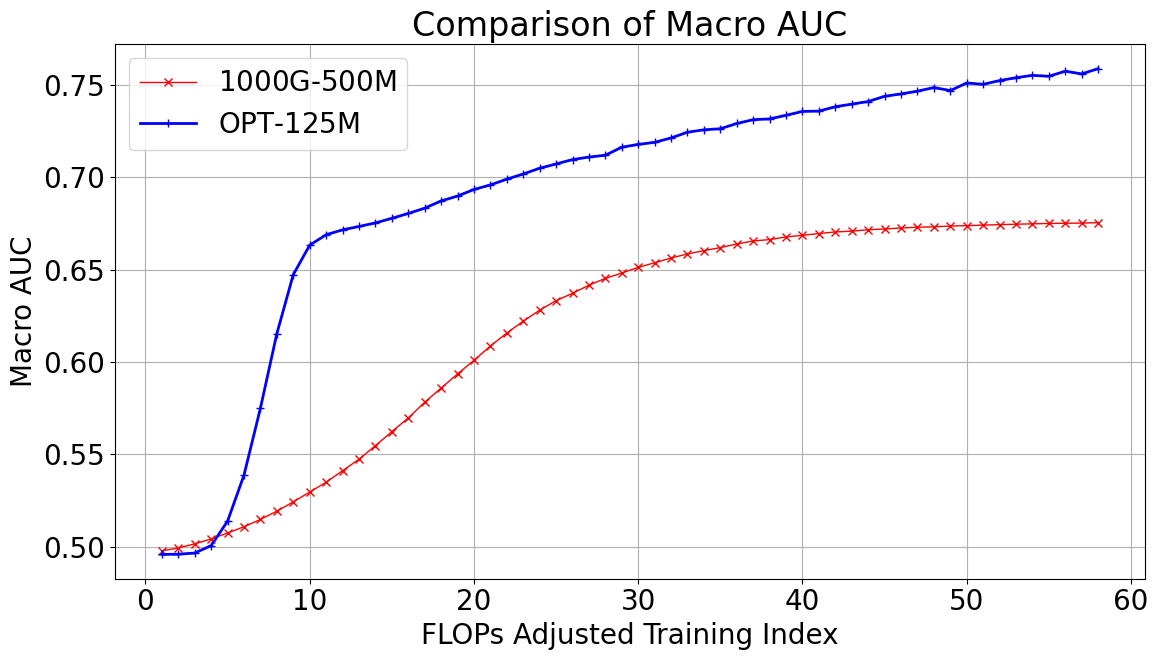

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 20 

def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


min_len = min(len(values_125m_400steps), len(values_nt))
# Shorten the data to the minimum length
values_125m_400steps_t = values_125m_400steps[:min_len]
values_nt_t = values_nt[:min_len]
# Reset indices to start from 1
values_125m_400steps_t.index = range(1, len(values_125m_400steps_t) + 1)
values_nt_t.index = range(1, len(values_nt_t) + 1)
values_nt_t = values_nt_t.apply(lambda x: float(x) if is_float(x) else np.nan)


# Plot the data
plt.figure(figsize=(12, 7))
plt.plot(values_125m_400steps_t.index, values_nt_t, label=r"$1000$G-$500$M", color='red', marker='x', linewidth=1)
plt.plot(values_125m_400steps_t.index, values_125m_400steps_t, label=r"OPT-$125$M", color='blue', marker='+', linewidth=2)

plt.xlabel('FLOPs Adjusted Training Index')
plt.ylabel('Macro AUC')
plt.title('Comparison of Macro AUC')
plt.legend(loc='upper left') 
plt.grid(True)
plt.tight_layout()
plt.show()
